## Importing All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import time
import warnings
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. GOOGLE (GOOGL) Stock Price Dataset

In [2]:
df = yf.download('GOOGL', start='2004-08-19', end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2004-08-19 00:00:00+00:00,2.504808,2.511011,2.604104,2.401401,2.502503,893181924
2004-08-20 00:00:00+00:00,2.703765,2.710460,2.729730,2.515015,2.527778,456686856
2004-08-23 00:00:00+00:00,2.730976,2.737738,2.839840,2.728979,2.771522,365122512
2004-08-24 00:00:00+00:00,2.617892,2.624374,2.792793,2.591842,2.783784,304946748
2004-08-25 00:00:00+00:00,2.646101,2.652653,2.702703,2.599600,2.626627,183772044


In [4]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2024-11-20 00:00:00+00:00,175.979996,175.979996,177.679993,173.779999,177.339996,18997100
2024-11-21 00:00:00+00:00,167.630005,167.630005,174.130005,163.699997,173.899994,59734400
2024-11-22 00:00:00+00:00,164.759995,164.759995,166.460007,163.899994,165.850006,38604600
2024-11-25 00:00:00+00:00,167.649994,167.649994,168.630005,165.610001,166.089996,33090900
2024-11-26 00:00:00+00:00,169.659302,169.659302,169.820007,167.649994,167.649994,10287381


In [5]:
df.columns = df.columns.get_level_values(0)
df

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2004-08-19 00:00:00+00:00,2.504808,2.511011,2.604104,2.401401,2.502503,893181924
2004-08-20 00:00:00+00:00,2.703765,2.710460,2.729730,2.515015,2.527778,456686856
2004-08-23 00:00:00+00:00,2.730976,2.737738,2.839840,2.728979,2.771522,365122512
2004-08-24 00:00:00+00:00,2.617892,2.624374,2.792793,2.591842,2.783784,304946748
2004-08-25 00:00:00+00:00,2.646101,2.652653,2.702703,2.599600,2.626627,183772044
...,...,...,...,...,...,...
2024-11-20 00:00:00+00:00,175.979996,175.979996,177.679993,173.779999,177.339996,18997100
2024-11-21 00:00:00+00:00,167.630005,167.630005,174.130005,163.699997,173.899994,59734400
2024-11-22 00:00:00+00:00,164.759995,164.759995,166.460007,163.899994,165.850006,38604600


In [6]:
df.duplicated().sum()

0

## Copying the dataset for future use

In [7]:
df1 = df.copy()
df1.reset_index(inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)

### Dropping unwanted column

In [9]:
df.drop(['Adj Close'], axis=1, inplace=True)

### Splitting into features and target

In [10]:
X = df.drop(['Close'], axis=1)
y = df['Close']

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

### Splitting the data into train and test set

In [12]:
# X_train, X_test, y_train, y_test = X[:round(X.shape[0]*0.8)], X[round(X.shape[0]*0.8):], y[:round(y.shape[0]*0.8)], y[round(y.shape[0]*0.8):]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building using Linear Regression

In [13]:
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print('Training Time:', end-start)

Training Time: 4.600793838500977


In [14]:
model.score(X_train, y_train)

0.9998437419177142

In [15]:
predicted = model.predict(X_test)
predicted

array([130.89490063,  12.01838827,  11.94539816, ...,  11.42443013,
        12.12453101,   7.07006761])

In [16]:
y_test

,Close
4442,128.823502
586,12.065065
553,11.891892
227,7.529780
1321,14.421421
...,...
3898,75.669502
1433,13.313313
1018,11.267768
582,12.114865


In [17]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
for a in prediction.index:
    for b in df1.index:
        if a == b:
            prediction['Date'] = df1['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2004-08-31 00:00:00+00:00,2.561812,2.823231
2004-09-07 00:00:00+00:00,2.542042,2.757165
2004-09-14 00:00:00+00:00,2.790040,2.887783
2004-09-16 00:00:00+00:00,2.852102,3.016081
2004-09-22 00:00:00+00:00,2.962462,3.152727
...,...,...
2024-10-22 00:00:00+00:00,165.139999,163.769995
2024-11-18 00:00:00+00:00,175.300003,173.131035
2024-11-21 00:00:00+00:00,167.630005,168.471219


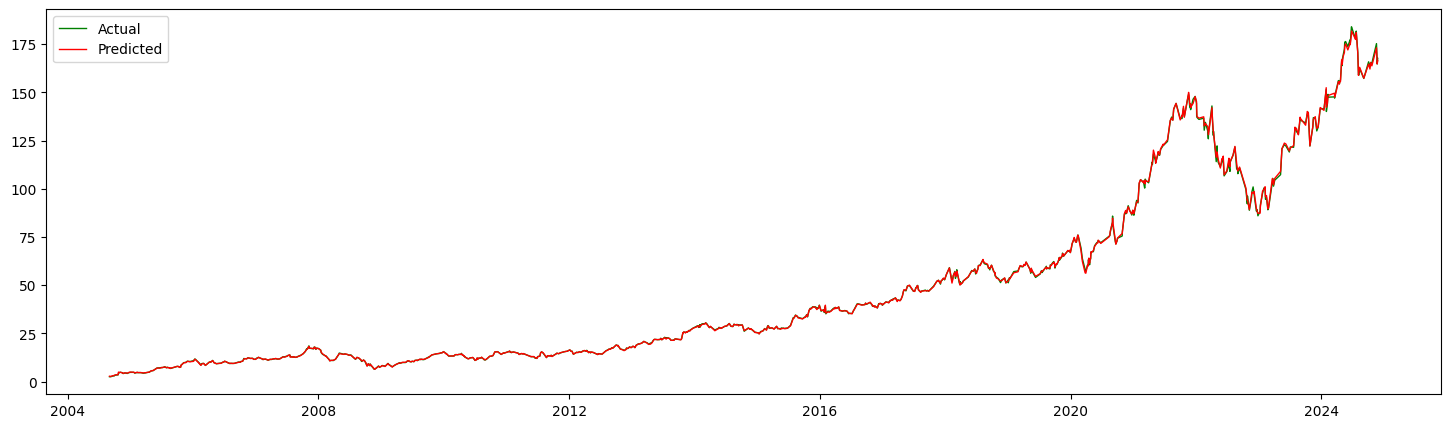

In [18]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()

In [19]:
model.predict(scaler.transform([[165.86, 167.65, 165.24, 3621520]]))

array([166.1407068])

In [20]:
df1[df1.Date == '2004-09-01']

Price,Date,Adj Close,Close,High,Low,Open,Volume
9,2004-09-01 00:00:00+00:00,2.502562,2.508759,2.576827,2.494244,2.57007,182765052


In [21]:
model.predict(scaler.transform([[2.57007, 2.576827, 2.494244, 182765052]]))

array([2.7504521])

## Calculating the Performance Evaluation Metrics

In [22]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.33900570416599407
Root Mean Squared Error: 0.5822419635907344
Mean Absolute Error: 0.3111979070930969


### Here the performance metrics are too much higher so, we have to tune the hyperparameters.

In [23]:
model_params = {
            'C': [0.1, 1, 10, 100, 1000],
            'kernel': ['rbf','linear', 'poly', 'sigmoid'],
            'gamma': [0.01, 0.1, 1, 'auto']
            }


grid_search = GridSearchCV(SVR(), model_params, cv=5, return_train_score=False)
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print('Training Time:', end-start)

Training Time: 275.37512254714966


In [24]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}

In [25]:
grid_search.best_score_

0.9999225601830986

In [26]:
grid_search_prediction = grid_search.predict(X_test)
grid_search_prediction

array([129.49906694,  12.03886521,  11.91208766, ...,  11.36322779,
        12.16148321,   7.13713978])

In [27]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': grid_search_prediction})
for a in prediction.index:
    for b in df1.index:
        if a == b:
            prediction['Date'] = df1['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2004-08-31 00:00:00+00:00,2.561812,2.585935
2004-09-07 00:00:00+00:00,2.542042,2.519436
2004-09-14 00:00:00+00:00,2.790040,2.766994
2004-09-16 00:00:00+00:00,2.852102,2.867351
2004-09-22 00:00:00+00:00,2.962462,2.972799
...,...,...
2024-10-22 00:00:00+00:00,165.139999,165.285472
2024-11-18 00:00:00+00:00,175.300003,174.720326
2024-11-21 00:00:00+00:00,167.630005,165.559729


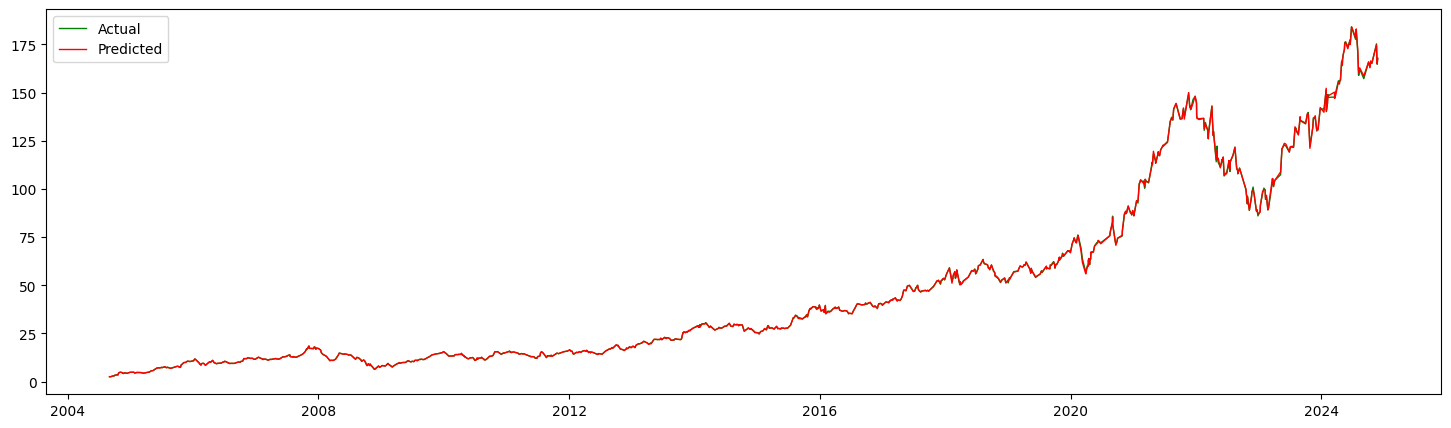

In [28]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()

### Performance Evaluation Metrics after Hyperparameter Tuning

In [29]:
mse = mean_squared_error(y_test, grid_search_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, grid_search_prediction)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.16794042745732543
Root Mean Squared Error: 0.4098053531340525
Mean Absolute Error: 0.2076065414398175
